# Loading Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
import string, re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Building Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, LSTM, Bidirectional

# Download Model
import pickle

# Loading Data

# https://www.kaggle.com/competitions/fake-news

In [2]:
data = pd.read_csv(r"D:\Courses language programming\LLM - Transformer - NLP\NLP - Complete Course\Projects For NLP\Data\fake-news\train.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
data.shape

(20800, 5)

# Preprocessing Data & Analysis

## Drop Some Columns -- (ID, Author)

In [5]:
def drop_col(data):
    for col in ["id", "author"]: data.drop(col, axis=1, inplace=True)
        
    return data

data = drop_col(data)
data.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

# Filling Missing Data

In [7]:
def fill_data(data):
    data["title"] = data["title"].fillna("No Title")
    data["text"] = data["text"].fillna("No text")
    return data

data = fill_data(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   text    20800 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 487.6+ KB


In [9]:
data.head(2)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0


In [10]:
data["new_text"] = data["title"] + " " + data["text"]

# Make Processing In Text

In [11]:
punc = list(string.punctuation)
stop_words = stopwords.words("english")

def processing_text(data):
    data.lower()
    data = re.sub("[^a-zA-Z]", ' ', data)
    
    data = " ".join([word for word in word_tokenize(data) if ((word not in stop_words) and (word not in punc))])    
    return data

In [12]:
data["Final_text"] = data["new_text"].apply(processing_text)
data.head()

,title,text,label,new_text,Final_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide We Didn Even See Comey Letter U...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",FLYNN Hillary Clinton Big Woman Campus Breitba...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,Why Truth Might Get You Fired Why Truth Might ...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,Civilians Killed In Single US Airstrike Have B...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,Iranian woman jailed fictional unpublished sto...


# Final Drop Data

In [13]:
def drop_extra_col(data):
    for col in ["title", "text", "new_text"]: data.drop(col, axis=1, inplace=True)
        
    return data

data = drop_extra_col(data)

In [14]:
data.head()

,label,Final_text
0,1,House Dem Aide We Didn Even See Comey Letter U...
1,0,FLYNN Hillary Clinton Big Woman Campus Breitba...
2,1,Why Truth Might Get You Fired Why Truth Might ...
3,1,Civilians Killed In Single US Airstrike Have B...
4,1,Iranian woman jailed fictional unpublished sto...


# Splitting Data

In [15]:
X = data["Final_text"]
Y = data["label"]

In [16]:
label = to_categorical(Y, 2)

# Tokenization

In [17]:
# Max_vocab_size = 20000
# max_sequance_lenght = 100
# Embeding_dim = 100

In [18]:
tokenize = Tokenizer(oov_token="<OOV>")
tokenize.fit_on_texts(X)
word_idx = tokenize.word_index

text2seq = tokenize.texts_to_sequences(X)
input_length = max([len(i) for i in text2seq])

pad_seq = pad_sequences(text2seq, maxlen=input_length, padding="pre", truncating="pre")

print("The Padding Sequance Shape is  --> ", pad_seq.shape)

vocabulary_size = len(word_idx) + 1

The Padding Sequance Shape is  -->  (20800, 13468)


In [33]:
pad_seq.shape

(20800, 13468)

In [19]:
input_length, vocabulary_size

(13468, 148609)

# Splitting Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(pad_seq, label, train_size=0.7, random_state=42)

# Building Model

In [21]:
model = tf.keras.models.Sequential(
    [
        Embedding(vocabulary_size, 150, input_length=input_length),
        GlobalAveragePooling1D(),
        Dense(128, activation="relu"),
        Dense(24, activation="relu"),
        Dense(2, activation="softmax")
    ])

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13468, 150)        22291350  
                                                                 
 global_average_pooling1d (G  (None, 150)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 22,313,824
Trainable params: 22,313,824
Non-trainable params: 0
____________________________________________

In [22]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
455/455 - 16s - loss: 0.6911 - accuracy: 0.5258 - val_loss: 0.6694 - val_accuracy: 0.6031 - 16s/epoch - 36ms/step
Epoch 2/10
455/455 - 14s - loss: 0.4361 - accuracy: 0.7941 - val_loss: 0.2397 - val_accuracy: 0.9172 - 14s/epoch - 31ms/step
Epoch 3/10
455/455 - 14s - loss: 0.1924 - accuracy: 0.9260 - val_loss: 0.1692 - val_accuracy: 0.9319 - 14s/epoch - 31ms/step
Epoch 4/10
455/455 - 14s - loss: 0.1126 - accuracy: 0.9613 - val_loss: 0.1893 - val_accuracy: 0.9370 - 14s/epoch - 31ms/step
Epoch 5/10
455/455 - 14s - loss: 0.0823 - accuracy: 0.9729 - val_loss: 0.2077 - val_accuracy: 0.9249 - 14s/epoch - 31ms/step
Epoch 6/10
455/455 - 14s - loss: 0.0596 - accuracy: 0.9805 - val_loss: 0.1153 - val_accuracy: 0.9630 - 14s/epoch - 31ms/step
Epoch 7/10
455/455 - 14s - loss: 0.0473 - accuracy: 0.9836 - val_loss: 0.1745 - val_accuracy: 0.9487 - 14s/epoch - 31ms/step
Epoch 8/10
455/455 - 14s - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.1897 - val_accuracy: 0.9401 - 14s/epoch - 31ms/step


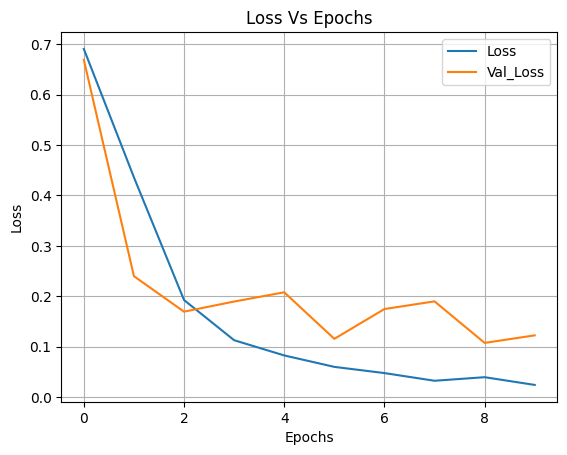

In [23]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

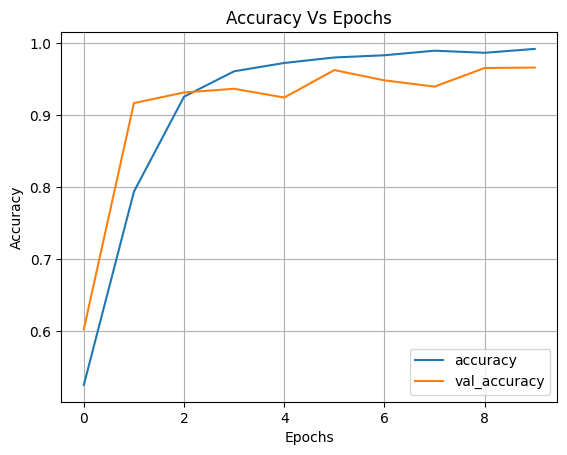

In [24]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Saving Model

In [26]:
model.save(r'D:\Pycharm\Computer Vision Project\NLP Project\Fake News\model.h5')

In [27]:
pickle.dump(tokenize, open(r'D:\Pycharm\Computer Vision Project\NLP Project\Fake News\tokenizer.bin', 'wb'))

# Deploy

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import streamlit as st
import pickle


model = load_model(r'D:\Pycharm\Computer Vision Project\NLP Project\Fake News\model.h5')
tokenizer = pickle.load(open(r'D:\Pycharm\Computer Vision Project\NLP Project\Fake News\tokenizer.bin', 'rb'))
class_label = {1: 'Fake', 0: 'Real'}
st.title('Fake News Project.📰🗞️')

text = st.text_input('Enter THe Text')
if text:
    text = tokenizer.texts_to_sequences([text])
    pad_seq = np.array(pad_sequences(text, maxlen=13468, padding="pre", truncating="pre"))
    prediction = model.predict(pad_seq)

    if st.button('predict'):
        st.write(class_label[prediction.argmax()])